# Processing real data with Pandas

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/pop_year.csv")
data

,year,total,male,female
0,1960,7077190,3633812,3443378
1,1965,7907113,4052583,3854530
2,1970,8603165,4410996,4192169
3,1975,9365972,4782387,4583585
4,1980,9693907,4899368,4794539
5,1985,10138642,5107555,5031087
6,1990,10662148,5364342,5297806
7,1991,10756829,5410665,5346164
8,1992,10829320,5444568,5384752
9,1993,10895987,5476547,5419440


In [3]:
# Verify if all totals are correctly calculated
if any(data.total != (data.male + data.female)):
    print("ERRORS")
else:
    print("No Errors")

No Errors


In [4]:
# Largest total population
max(data.total)

# np.max(data[:, 1])

11239224

In [5]:
# Largest male population
max(data.male)

5617802

In [6]:
# Smallest male population
min(data.male)

3633812

In [7]:
# Year with larger total population
data.iloc[data.total.argmax()]
# data[np.argmax(data[:,1])]

year          2016
total     11239224
male       5598165
female     5641059
Name: 32, dtype: int64

In [9]:
# Maximum difference between two male populations
max(data.male.diff().dropna())

418771.0

In [10]:
# Which are the years of the maximum difference in total population?
idx_of_max = data.total.diff(1).argmax()
data.iloc[idx_of_max-1].year, data.iloc[idx_of_max].year

(1960, 1965)

In [11]:
# What is the largest difference between the male and female population
max((data.male - data.female).abs())

218827

Now, we can also create all sort of fancy graphs with matplotlib and seaborn

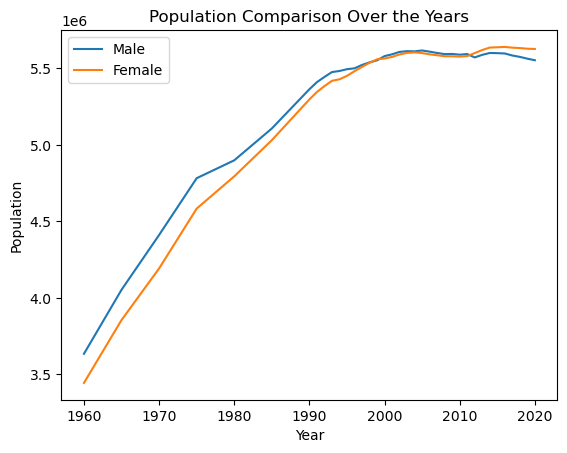

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='year', y='male', data=data, label='Male')
sns.lineplot(x='year', y='female', data=data, label='Female')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.title('Population Comparison Over the Years')
plt.show()

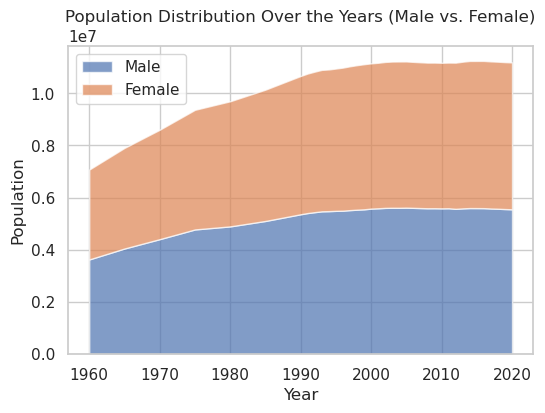

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
sns.set(style="whitegrid")

# Stacked area plot
plt.figure(figsize=(6, 4))
plt.stackplot(data['year'], data['male'], data['female'], labels=['Male', 'Female'], alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(loc='upper left')
plt.title('Population Distribution Over the Years (Male vs. Female)')
plt.show()


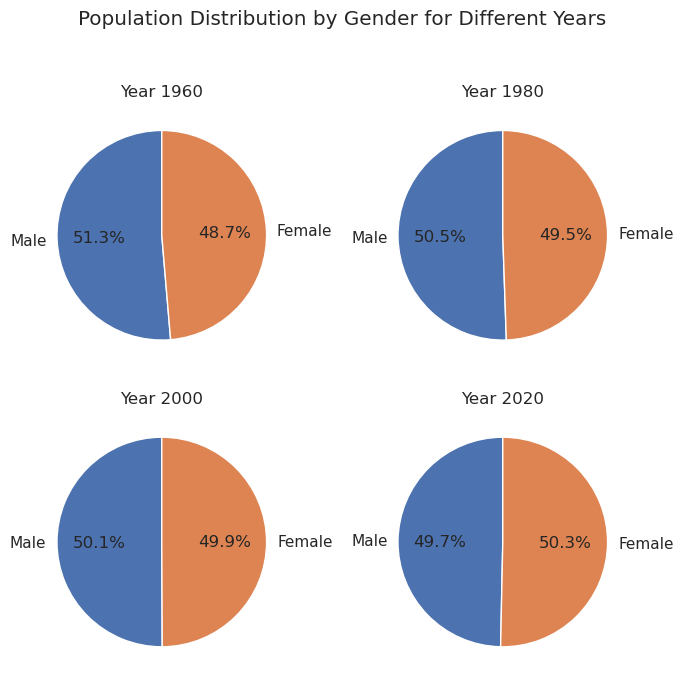

In [14]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'
# Assuming 'year' column contains the years you want to plot
years_to_plot = [1960, 1980, 2000, 2020]

# Create a subplot with 2 rows and 2 columns for four pie charts
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
fig.suptitle('Population Distribution by Gender for Different Years')

for i, year in enumerate(years_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Filter the data for the current year
    year_data = data[data['year'] == year]

    # Calculate the sum of male and female populations for the current year
    male_population = year_data['male'].sum()
    female_population = year_data['female'].sum()

    # Create a pie chart for the current year
    labels = ['Male', 'Female']
    sizes = [male_population, female_population]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Year {year}')

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.show()
